### Visualization of data
In the file fertility.dta, you can find a dataset containing information on fertility levels in the US, as well as its potential determinants from 1914 to 1984. 

1. Load the data and create a graph showing how the general fertility rate (gfr) changes over time.

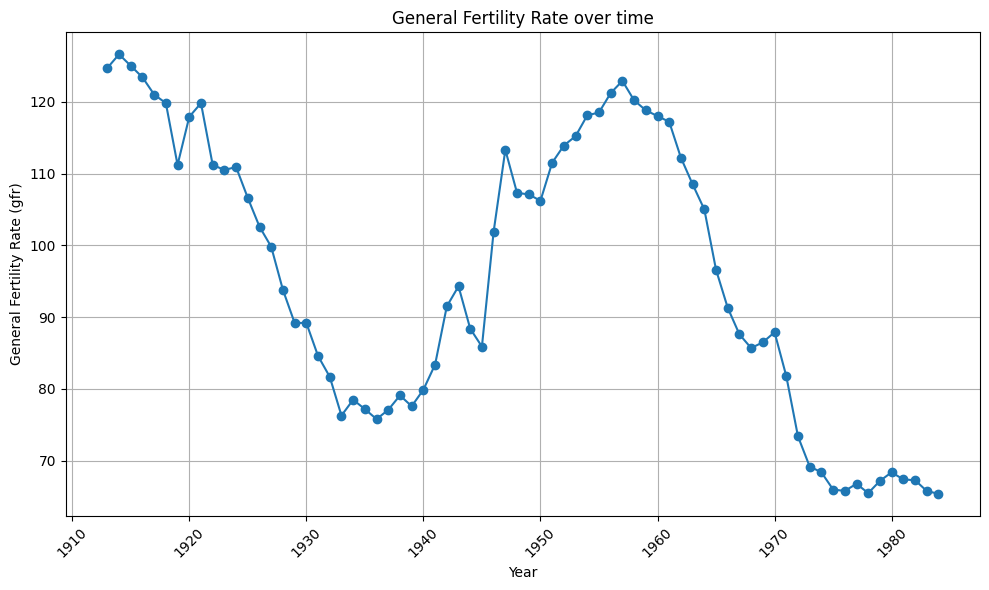

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data and save as a DataFrame
fertility_path = r'C:\Users\jonaw\OneDrive\Dokumente\Coding\Computational Economics\Econometrics\Data\fertility.csv'

fertility = pd.read_csv(fertility_path)

# Visualize gfr
plt.figure(figsize=(10, 6))
plt.plot(fertility['year'], fertility['gfr'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('General Fertility Rate (gfr)')
plt.title('General Fertility Rate over time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2. Add the change of personal tax exemptions (pe) to the graph.

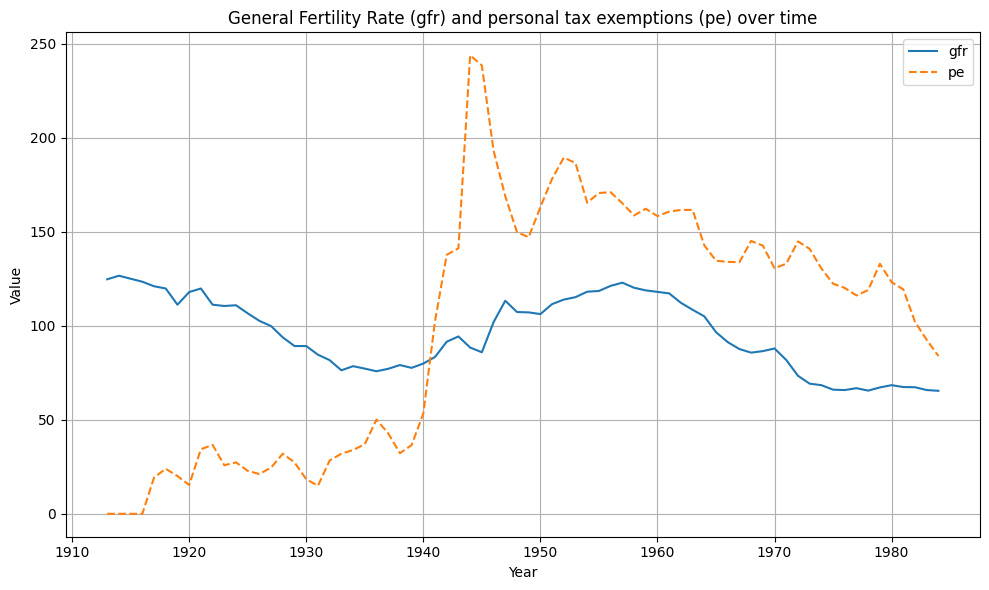

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(fertility['year'], fertility['gfr'], linestyle='-', label='gfr')
plt.plot(fertility['year'], fertility['pe'], linestyle='--', label='pe')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('General Fertility Rate (gfr) and personal tax exemptions (pe) over time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 2 Data management: lagged values and time trends

3. Generate the variables pe_1 and pe_2, representing the value of pe at t − 1 and t − 2, respectively.

In [17]:
# Make sure the DF is sorted by year
fertility = fertility.sort_values(by='year')

# Create lagge variables for pe
fertility['pe_1'] = fertility['pe'].shift(1, fill_value=0)
fertility['pe_2'] = fertility['pe'].shift(2, fill_value=0)

# Check the result
print(fertility[['year', 'pe', 'pe_1', 'pe_2']].head(10))

   year         pe       pe_1       pe_2
0  1913   0.000000   0.000000   0.000000
1  1914   0.000000   0.000000   0.000000
2  1915   0.000000   0.000000   0.000000
3  1916   0.000000   0.000000   0.000000
4  1917  19.270000   0.000000   0.000000
5  1918  23.940001  19.270000   0.000000
6  1919  20.070000  23.940001  19.270000
7  1920  15.330000  20.070000  23.940001
8  1921  34.320000  15.330000  20.070000
9  1922  36.650002  34.320000  15.330000


4. Generate a linear and quadratic time trend.

In [11]:
# create a period variable t
fertility['t'] = np.arange(len(fertility))

# Quadratic tend
fertility['t_sq'] = fertility['t'] ** 2

#Check the result
print(fertility[['year', 't', 't_sq']].head(10))

   year  t  t_sq
0  1913  0     0
1  1914  1     1
2  1915  2     4
3  1916  3     9
4  1917  4    16
5  1918  5    25
6  1919  6    36
7  1920  7    49
8  1921  8    64
9  1922  9    81


### 3 Static and finite lag models

5. Estimate the following model:
   $$ gfr_t = \beta_0 + \beta_1 pe_t + u_t$$

In [24]:
import statsmodels.api as sm

# Define gfr and pe
gfr = fertility['gfr']
pe = sm.add_constant(fertility['pe'])   # Add a constant term to the pe variable

# Fit the model
model1 = sm.OLS(gfr, pe).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                   0.03901
Date:                 Di, 29 Apr 2025   Prob (F-statistic):              0.844
Time:                        10:47:32   Log-Likelihood:                -316.63
No. Observations:                  72   AIC:                             637.3
Df Residuals:                      70   BIC:                             641.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.3443      4.305     22.381      0.0

6. Now estimate a finite lag model of order 2: 
$$gfr_t = \beta_0 + \beta_1\,pe_t + \beta_2\,pe_{t-1} + \beta_3\,pe_{t-2} + u_t$$

What is the estimated long-run multiplier (long-run propensity) of the per- sonal tax exemption?

In [25]:
# Estimate finite-lag(2) model
X = sm.add_constant(fertility[['pe', 'pe_1', 'pe_2']])
model2 = sm.OLS(gfr, X).fit()

summary2 = model2.summary()
print(summary2)

# Long-run multiplier (LRP) like `nlcom _b[pe]+_b[pe_1]+_b[pe_2]`
params = model2.params
LRP = params['pe'] + params['pe_1'] + params['pe_2']
print("Long‐run propensity:", LRP)


                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                   0.08137
Date:                 Di, 29 Apr 2025   Prob (F-statistic):              0.970
Time:                        10:47:32   Log-Likelihood:                -316.52
No. Observations:                  72   AIC:                             641.0
Df Residuals:                      68   BIC:                             650.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.2043      4.374     21.996      0.0

7. Augment the model by including dummy variables controlling for the period of World War 2 (ww2) and the availability of the contraceptive pill (pill):

$$gfr_t = \beta_0 + \beta_1\,pe_t + \beta_2\,pe_{t-1} + \beta_3\,pe_{t-2} + \beta4 ww2_t + \beta5 pill_t + u_t$$

What is the interpretation of the $\beta_5$ coefficient? Did the availability of the pill have a significant impact on the general fertility rate?

In [26]:
# Define new subset of X
X = sm.add_constant(fertility[['pe', 'pe_1', 'pe_2', 'ww2', 'pill']])
model3 = sm.OLS(gfr, X).fit()
summary3 = model3.summary()
print(summary3)



                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     11.91
Date:                 Di, 29 Apr 2025   Prob (F-statistic):           3.14e-08
Time:                        10:47:32   Log-Likelihood:                -293.49
No. Observations:                  72   AIC:                             599.0
Df Residuals:                      66   BIC:                             612.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.7195      3.257     30.308      0.0

We can see that the Variable "pill" is the only significant variable with a p-value < 0,05

8. Estimate the model again, this time allowing for a quadratic time trend:

$$gfr_t = \beta_0 + \beta_1\,pe_t + \beta_2\,pe_{t-1} + \beta_3\,pe_{t-2} + \beta4 ww2_t + \beta5 pill_t + \beta_6 t + \beta_7 t^2 + u_t$$

How does the general fertility rate change when t increases by 1 year?

In [ ]:
# Define new subset of X
X = sm.add_constant(fertility[['pe', 'pe_1', 'pe_2', 't', 't_sq']])
model4 = sm.OLS(gfr, X).fit()   

summary4 = model4.summary()
print(summary4)

# Set estimated parameters
params = model4.params
b6 = model4.params['t']
b7 = model4.params['t_sq']

# Calculate the marginal effect ∂ĝfr/∂t = b6 + 2*b7*t
fertility['marginal_effect'] = b6 + 2 * b7 * fertility['t']

print(fertility[['year', 't', 'marginal_effect']].head())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     29.69
Date:                 Di, 29 Apr 2025   Prob (F-statistic):           1.14e-15
Time:                        10:54:31   Log-Likelihood:                -274.22
No. Observations:                  72   AIC:                             560.4
Df Residuals:                      66   BIC:                             574.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        123.0774      4.330     28.421      0.0

9. How has the estimated long-run multiplier for personal tax exemptions changed relative to the value in Question 5? Why did this change happen?